In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/synchronous-machine-dataset/SynchronousMachine.csv


In [2]:
df = pd.read_csv('/kaggle/input/synchronous-machine-dataset/SynchronousMachine.csv')
df.head()

,I_y,PF,e_PF,d_if,I_f
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497


In [3]:
import matplotlib.pyplot as plt 
import seaborn as sb 

Text(0.5, 1.0, 'Correlation Matrix.')

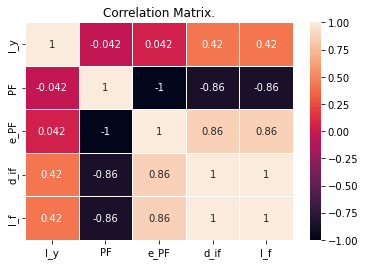

In [4]:
correlation = df.corr()
sb.heatmap(correlation ,linewidth = 1 ,annot = True).set_title('Correlation Matrix.')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], df['I_f'], test_size = 0.33)
N, D = X_train.shape

In [6]:
df[["I_y","PF", "e_PF", "d_if", "I_f"]].describe()

,I_y,PF,e_PF,d_if,I_f
count,557.000000,557.000000,557.000000,557.000000,557.000000
mean,4.499820,0.825296,0.174704,0.350659,1.530659
std,0.896024,0.103925,0.103925,0.180566,0.180566
min,3.000000,0.650000,0.000000,0.037000,1.217000
25%,3.700000,0.740000,0.080000,0.189000,1.369000
50%,4.500000,0.820000,0.180000,0.345000,1.525000
75%,5.300000,0.920000,0.260000,0.486000,1.666000
max,6.000000,1.000000,0.350000,0.769000,1.949000


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

i = Input(shape = (D,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = SGD(0.001, 0.9)
)

r =  model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)




User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 2.3504 - val_loss: 2.0520
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.6741 - val_loss: 1.2996
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0122 - val_loss: 0.7533
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5686 - val_loss: 0.4211
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3094 - val_loss: 0.2330
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1674 - val_loss: 0.1264
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0889 - val_loss: 0.0689
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0469 - val_loss: 0.0381
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0248 - val_loss: 0.0215
Epoch 10/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0133 - val_loss: 0.0124
Epoch 11

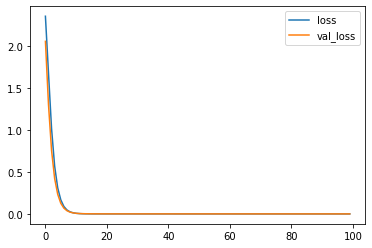

In [9]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()